# Pandas - Toxic Comments EDA

Наша цель провести первичный анализ данных текущего соревнования на Kaggle [Toxic Comment Classification Challenge](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge)

Данные можно скачать тут - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

In [3]:
#basics
import pandas as pd 
import numpy as np

### Load data

Загружаем датасет:

In [13]:
train = pd.read_csv('train.csv')
test = pd.read_csv('../data/Toxis comments/test.csv')

`train` это [Pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). 


### First look

Давайте взглянем на данные:

In [10]:
train.head(20)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [14]:
test.head(20)

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
5,0001ea8717f6de06,Thank you for understanding. I think very high...
6,00024115d4cbde0f,Please do not add nonsense to Wikipedia. Such ...
7,000247e83dcc1211,:Dear god this site is horrible.
8,00025358d4737918,""" \n Only a fool can believe in such numbers. ..."
9,00026d1092fe71cc,== Double Redirects == \n\n When fixing double...


In [16]:
print(train.shape)
print(test.shape)

(159571, 8)
(153164, 2)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
id              153164 non-null object
comment_text    153164 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [6]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Можем смотреть отдельно на каждую колонку, тогда мы будем работать с [Pandas Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html):

In [7]:
train['toxic'].sample(10)

98089     0
6716      0
30495     0
101345    0
111745    0
130959    0
3779      0
121202    0
135680    0
28953     1
Name: toxic, dtype: int64

In [19]:
train['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [9]:
train['toxic'].value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

Clean

Индексация DataFrame:

In [34]:
train.iloc[1000:1005,2:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
1000,0,0,0,0,0,0,True
1001,0,0,0,0,0,0,True
1002,0,0,0,0,0,0,True
1003,1,0,1,0,0,0,False
1004,0,0,0,0,0,0,True


Агрегации:

In [11]:
x = train.iloc[:,2:].sum()
x

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [37]:
rowsums=train.iloc[:,2:].sum(axis=1)

Создадим новую фичу:

In [13]:
train['clean']=(rowsums==0)

In [14]:
#count number of clean entries
print("Total comments = ", len(train))
print("Total clean comments = ", train['clean'].sum())
print("Total tags =", x.sum())

Total comments =  159571
Total clean comments =  143346
Total tags = 35098


### Clean data

In [15]:
train.isnull().head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [16]:
print("Check for missing values in Train dataset")
null_check=train.isnull().sum()
print(null_check)
print("filling NA with \"unknown\"")

Check for missing values in Train dataset
id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean            0
dtype: int64
filling NA with "unknown"


### Vizalization

In [29]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

In [18]:
x

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

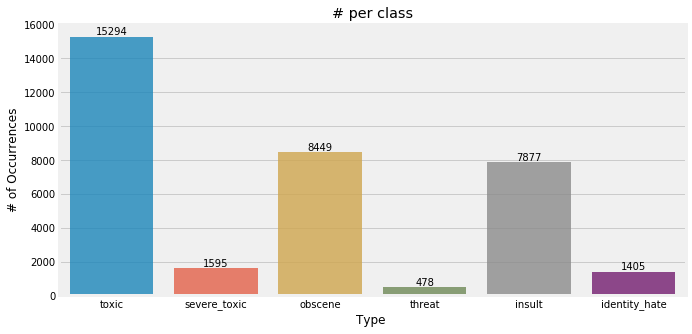

In [19]:
plt.figure(figsize=(10,5))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Multi tagging

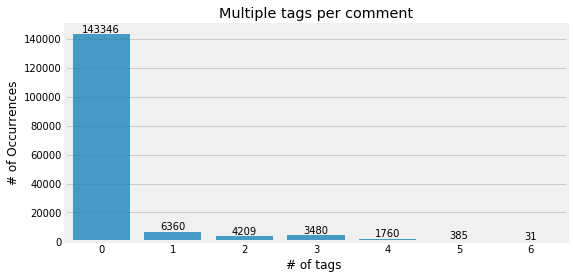

In [20]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
color = sns.color_palette()
ax = sns.barplot(x.index, x.values, alpha=0.8,color=color[0])
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Coorelation

In [21]:
temp_df=train.iloc[:,2:-1]

In [22]:
temp_df.head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


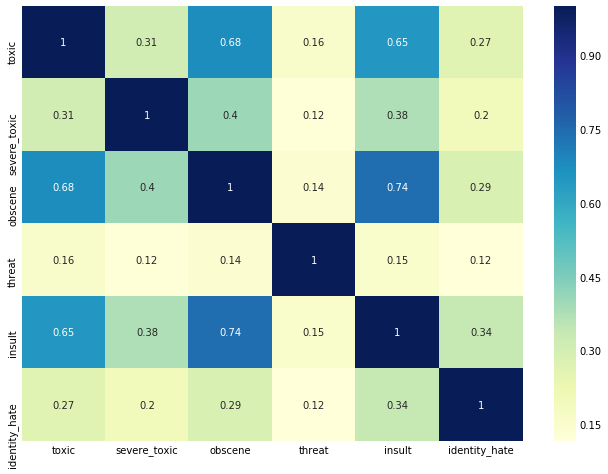

In [23]:
# filter temp by removing clean comments
# temp_df=temp_df[~train.clean]

corr=temp_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, cmap="YlGnBu")

Crosstab:

In [24]:
pd.crosstab(temp_df['insult'], temp_df['obscene'])

obscene,0,1
insult,,
0,149400,2294
1,1722,6155


In [25]:
# look at toxic with other tags
main_col="toxic"
corr_mats=[]
for other_col in temp_df.columns[1:]:
    confusion_matrix = pd.crosstab(temp_df[main_col], temp_df[other_col])
    corr_mats.append(confusion_matrix)

In [26]:
out = pd.concat(corr_mats,axis=1,keys=temp_df.columns[1:])
out

severe_toxic       obscene        threat       insult        \
severe_toxic            0     1       0     1       0    1       0     1   
toxic                                                                      
0                  144277     0  143754   523  144248   29  143744   533   
1                   13699  1595    7368  7926   14845  449    7950  7344   

             identity_hate        
severe_toxic             0     1  
toxic                             
0                   144174   103  
1                    13992  1302

### Let's read comments :)

In [22]:
pd.options.display.max_colwidth = -1

In [24]:
train[train.toxic==1].sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
38748,6763f57dc4d99681,"Buck Winston \n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nFuck you, I won't do what you tell me\n\nMotherfucker\n\nUgh",1,1,1,0,1,0
75271,c95aa516b5b7c177,"""\n\n D€ATH TO NORWEGIANS AND ALL ANTI-SEℳITES WHO SIDE WITH THE """"PALESTINIANS."""" D€ATH TO THE NATION THAT PRODUCED QUISLING. \n\n€UROTRASH ₩HORE. FU₵KING COMMIE SCUM.""",1,0,1,1,1,1
62028,a5f5f4145e61c8a2,"Are you frickin crazy? This guy was going around harassing people! What the hell did I do here! I never once attacked him! Neither me, or whoever!",1,0,0,0,0,0
83500,df68180279ca7d03,"""\n That's really stupid (no wonder I can never remember) !! Thanks, (Talk) """,1,0,0,0,0,0
51442,899c7847276f2f8d,You must be stupid \n\nI am referencing an act people in power will do to prevent someone from saying things that will show them for who they truly are.\nIt's not a death threat. You just want to look like a fucking victim. My god this is ridiculous.,1,0,1,0,1,0
89203,eea5b995d716533f,I'M GONNA DDELETE WIKIPEDIA BECAUS EO FYOU BUTTFACE \n\nI'M GONA HIRE THJOKER TO DELTE THIS HOLE SITE YOU BUTTTFACE NO ONE EVEN LIKESITS ANYMOREANYWAYS BUTTAAFCE,1,1,0,0,1,0
124606,9a9b7b0c9dea29c7,I notice that you added Cheri DiNovo's name to the list short story contributors at the New Yorker Magazine article. Would you care to mention a single short story she contributed to that magazine? What issue(s)? You can't because you are lying. You gay NDP supporters have real problems with the concept of truth,1,0,0,0,0,0
107890,40b0c83063414299,"Can we block certain administrators? \n\nThere are certain administators that due to certain extra curricular activities should not be allowed to contribute, edit, or even view this page or any other pages about or referencing dogs. These administrators are sick twisted individuals who view dogs not as playful domesticated creatures but rather their personal pleasure devices. They must be stopped.",1,0,0,0,0,0
115697,6abbd0de15e41341,Nazi Bastard \n\n I will hang your corpse from a tree.,1,0,1,1,1,1
108928,466e40d11f3ecf03,"telling the truth. You will of course not be such a piece of garbage that you'll care, because you actually have a life while we are losers",1,0,1,0,0,0


In [46]:
print("severe_toxic: \n")
print(train[train.severe_toxic==1]['comment_text'].sample(1).iloc[0])

severe_toxic: 

Fuck you 
fred fuck you you bitch ass punk u can suck a dick deleting everything fuck you ho go to hell you dumbass. your a bitch you stupid ass motherfucker. put a big stick in your mouth and leave.


In [47]:
print("threat: \n")
print(train[train.threat==1]['comment_text'].sample(1).iloc[0])

threat: 

Oh not you again!!! And so? After the block has expired, Im gonna kick Gwerns ass again you admin wannabe!!! Im gonna rape you all!!!


### Wordcloud

In [48]:
#!pip install wordcloud

In [25]:
from wordcloud import WordCloud ,STOPWORDS

In [27]:
sample=train[train.threat==1]

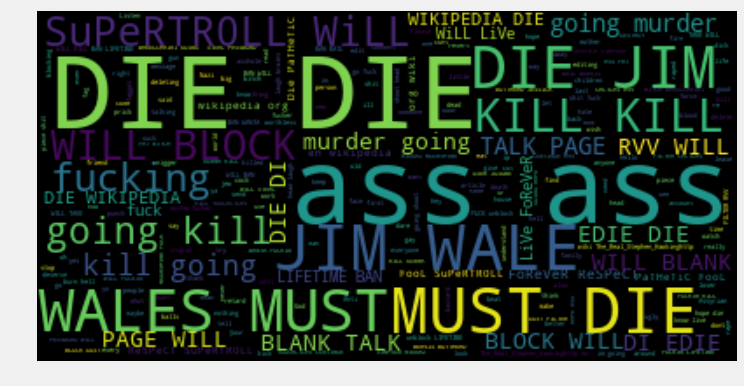

In [31]:
text=sample.comment_text.values

wc= WordCloud(max_font_size=60, background_color="black",max_words=2000,stopwords=STOPWORDS)
wc.generate(" ".join(text))
plt.figure(figsize=(12,6))
plt.axis("off")
plt.imshow(wc.recolor(colormap= 'viridis' , random_state=17),
           interpolation="bilinear")
plt.show()

### Feature engineering:

In [52]:
import re
import string

Создадим новую фичу "количетво предложений" в комментарии:

In [53]:
train['count_sent']=train["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

In [78]:
train[:2]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,True,2,43,41,264,10,2,11,19,5.162791,95.348837,23.255814
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,True,1,17,17,112,12,1,3,3,5.588235,100.000000,70.588235


И еще немного новых фич:

In [79]:
train['count_word']=train["comment_text"].apply(lambda x: len(str(x).split()))
#Unique word count
train['count_unique_word']=train["comment_text"].apply(lambda x: len(set(str(x).split())))
#Letter count
train['count_letters']=train["comment_text"].apply(lambda x: len(str(x)))
#punctuation count
train["count_punctuations"] =train["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#upper case words count
train["count_words_upper"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
#title case words count
train["count_words_title"] = train["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
#Number of stopwords
train["count_stopwords"] = train["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
#Average length of the words
train["mean_word_len"] = train["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [32]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own'

In [87]:
train.sample(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,count_sent,count_word,count_unique_word,count_letters,count_punctuations,count_words_upper,count_words_title,count_stopwords,mean_word_len,word_unique_percent,punct_percent
146548,2df40c21ec948442,I'm sure there are many but they have already been driven off in frustration,0,0,0,0,0,0,True,1,14,14,76,1,0,0,9,4.5,100.0,7.142857
134533,cf699551213af88c,U SUCK COCK U IDIOTS!!!!!!!!!!!!!!!!,1,0,1,0,1,0,False,1,5,4,36,16,5,2,0,6.4,80.0,320.000000


In [56]:
#derived features
#Word count percent in each comment:
train['word_unique_percent']=train['count_unique_word']*100/train['count_word']
#derived features
#Punct percent in each comment:
train['punct_percent']=train['count_punctuations']*100/train['count_word']

### Cut long tails

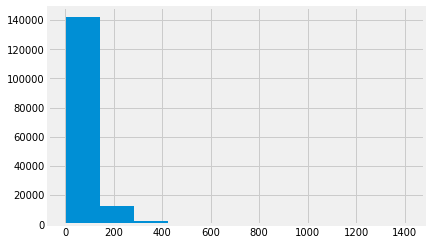

In [92]:
train['count_word'].hist()

In [58]:
train['count_word'].max()

1411

***!!! Так делать не нужно:***

In [59]:
train['count_word'].loc[train['count_word']>200] = 200

/home/cyned/virtenvs/datascience/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


***Нужно так:***

In [95]:
train.loc[train['count_word']>200, 'count_word'] = 200

In [96]:
train['count_word'].max()

200

In [97]:
train.loc[train['count_sent']>10, 'count_sent'] = 10 

In [98]:
train.loc[train['count_unique_word']>200, 'count_unique_word'] = 200

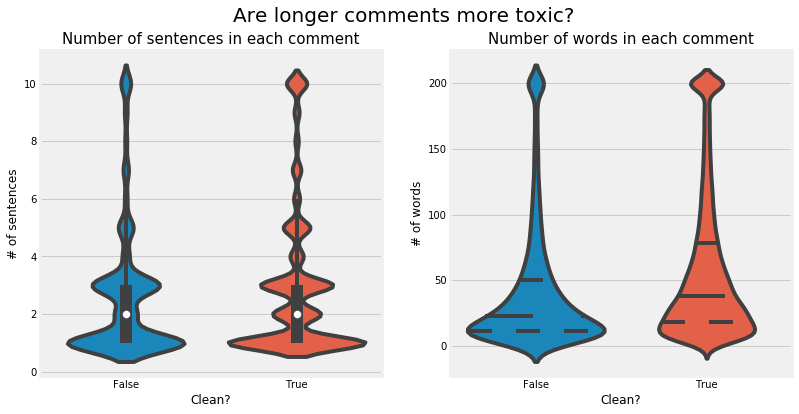

In [99]:
plt.figure(figsize=(12,6))
## sentenses
plt.subplot(121)
plt.suptitle("Are longer comments more toxic?",fontsize=20)
sns.violinplot(y='count_sent',x='clean', data=train, split=True)
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of sentences', fontsize=12)
plt.title("Number of sentences in each comment", fontsize=15)
# words
plt.subplot(122)
sns.violinplot(y='count_word',x='clean', data=train, split=True, inner="quart")
plt.xlabel('Clean?', fontsize=12)
plt.ylabel('# of words', fontsize=12)
plt.title("Number of words in each comment", fontsize=15)

plt.show()

### Spammers

Посмотрим как распределены спам коментарии

In [100]:
#spammers - comments with less than 40% unique words
spammers=train[train['word_unique_percent']<30]

In [101]:
print("Clean Spam example:")
print(spammers[spammers.clean==1].comment_text.iloc[1])

Clean Spam example:
Towns and Villages in Ark-La-Tex]]
 Cities, boroughs and towns in the Republic of Ireland
 Cities, boroughs, and townships along the Susquehanna River
 Cities, towns and villages in Alborz Province
 Cities, towns and villages in Ardabil Province
 Cities, towns and villages in Bhutan
 Cities, towns and villages in Bushehr Province
 Cities, towns and villages in Chaharmahal and Bakhtiari Province
 Cities, towns and villages in Cyprus
 Cities, towns and villages in Dutch Limburg
 Cities, towns and villages in East Azerbaijan Province
 Cities, towns and villages in East Timor
 Cities, towns and villages in Fars Province
 Cities, towns and villages in Flevoland
 Cities, towns and villages in Friesland
 Cities, towns and villages in Gelderland
 Cities, towns and villages in Gilan Province
 Cities, towns and villages in Golestan Province
 Cities, towns and villages in Groningen
 Cities, towns and villages in Hamadan Province
 Cities, towns and villages in Hormozgan Provinc

In [102]:
print("Toxic Spam example:")
print(spammers[spammers.toxic==1].comment_text.iloc[2])

Toxic Spam example:
User:NHRHS2010 is a homo like mitt romney is. 
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.
 User:NHRHS2010 is a homo like mitt romney is. 
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like mitt romney is. ==
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like mitt romney is. ==
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like mitt romney is. ==
User:NHRHS2010 is a homo like mitt romney is.
 User:Enigmaman is a homo like mitt romney is. 
User:Enigmaman is a homo like mitt romney is.== User:NHRHS2010 is a homo like 

In [107]:
#For the desired plots , the data must be in long format
temp_df = pd.melt(train, value_vars=['count_word', 'count_unique_word'], id_vars='clean')

temp_df.head()

,clean,variable,value
0,True,count_word,43
1,True,count_word,17
2,True,count_word,42
3,True,count_word,113
4,True,count_word,13


In [104]:
import matplotlib.gridspec as gridspec 

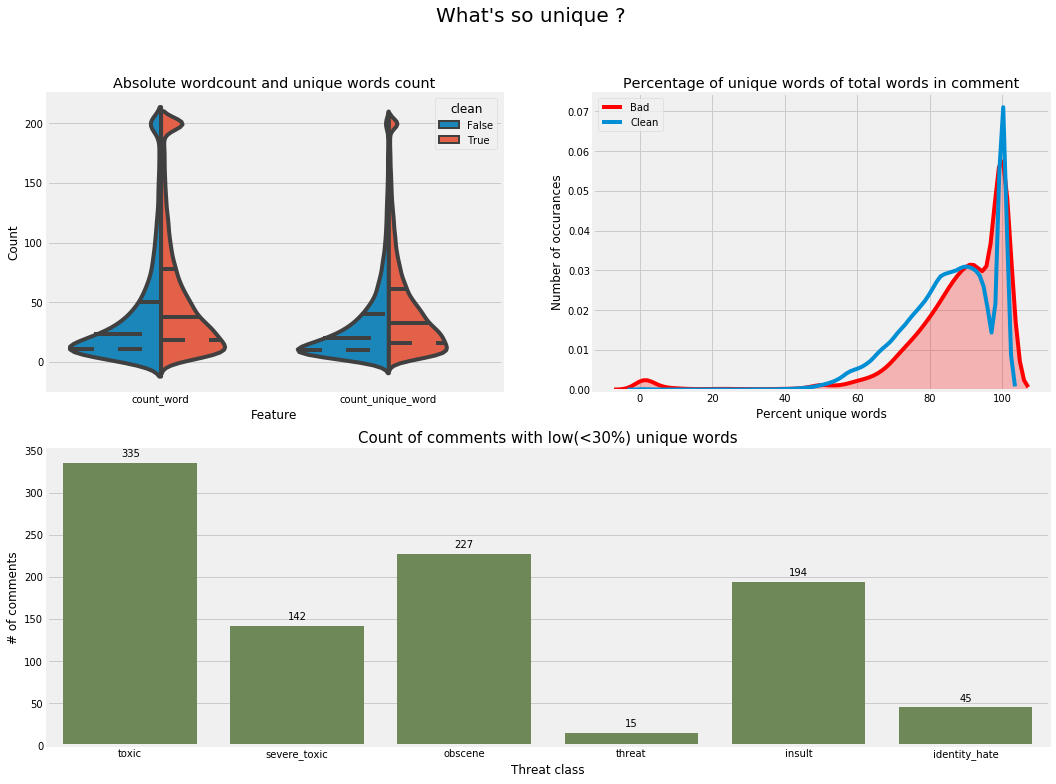

In [106]:
plt.figure(figsize=(16,12))
plt.suptitle("What's so unique ?",fontsize=20)
gridspec.GridSpec(2,2)
plt.subplot2grid((2,2),(0,0))
sns.violinplot(x='variable', y='value', hue='clean', data=temp_df, split=True,inner='quartile')
plt.title("Absolute wordcount and unique words count")
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.subplot2grid((2,2),(0,1))
plt.title("Percentage of unique words of total words in comment")
#sns.boxplot(x='clean', y='word_unique_percent', data=train_feats)
ax=sns.kdeplot(train[train.clean == 0].word_unique_percent, label="Bad",shade=True,color='r')
ax=sns.kdeplot(train[train.clean == 1].word_unique_percent, label="Clean")
plt.legend()
plt.ylabel('Number of occurances', fontsize=12)
plt.xlabel('Percent unique words', fontsize=12)

x=spammers.iloc[:,2:8].sum()
plt.subplot2grid((2,2),(1,0),colspan=2)
plt.title("Count of comments with low(<30%) unique words",fontsize=15)
ax=sns.barplot(x=x.index, y=x.values,color=color[3])

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.xlabel('Threat class', fontsize=12)
plt.ylabel('# of comments', fontsize=12)
plt.show()

**Вывод: спамеры пишут более "токсичные" комментарии. Это будет хорошей фичей для ML**